<a href="https://colab.research.google.com/github/240609/MLF/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0.45367464  5.98985979]
 [11.1126243  16.84469649]
 [ 9.58603089  7.36472467]]


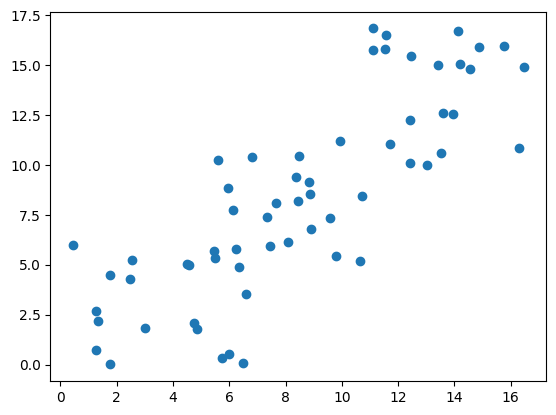

In [37]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

loaded_points = np.load('sample_data/k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

k_clusters = 3

def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:

    initial_clusters = np.random.choice(points.shape[0], k_clusters)
    initial_clusters = points[initial_clusters]

    return initial_clusters

initial_clusters = initialize_clusters(loaded_points, k_clusters)
print(initial_clusters)


In [103]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:


    #distances_array = np.square(norm(points - centroid), axis=1)
    distances_array = np.linalg.norm(points[:, np.newaxis] - centroid, axis=2)
    #print(distances_array)


    return distances_array

distances_array = calculate_metric(loaded_points, initial_clusters)
distances_array.shape

(60, 3)

In [104]:
def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:

    distances_array = np.asarray([calculate_metric(points, centroid) for centroid in centroids_points])


    return distances_array

all_distances = compute_distances(loaded_points, initial_clusters)
all_distances.shape

(3, 60, 1)

In [105]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:

    assigned_centroids = np.argmin(distances, axis=0)


    return assigned_centroids

assigned_centroids = assign_centroids(all_distances)
print(assigned_centroids.shape)

(60, 1)


In [106]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:


    minimal_distances = distances[assigned_centroids, np.arange(distances.shape[1])]
    objective_function_value = np.sum(minimal_distances)


    return objective_function_value

objective_function_value = calculate_objective(assigned_centroids, all_distances)
objective_function_value

27746.70013676082

In [113]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:


    new_clusters = []
    for cluster_id in range(k_clusters):
        j = np.where(assigned_centroids == cluster_id)
        points_sel = points[j]
        new_clusters.append(np.mean(points_sel, axis=0))

    new_clusters = np.asarray(new_clusters)


    return new_clusters


new_clusters = calculate_new_centroids(loaded_points, assigned_centroids, k_clusters)
new_clusters

array([ 2.87691951, 13.4098336 ,  8.61964433])

In [ ]:
def fit(points: np.ndarray, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:


    ###################################
    # Write your own code here #

    centroid_points = np.array([])
    last_objective = 10000.0

    for _ in range(n_of_oterations):
        pass

    ###################################

    return centroid_points, last_objective

In [ ]:
k_all = range(2, 10)
all_objective = []

plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

In [ ]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

loaded_image = imread('sample_data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:

    return image


img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()